In [ ]:
! unzip hack_20220603.zip -d hack

In [ ]:
import numpy as np
import pandas as pd
import re

from datetime import datetime
import datetime, os

import pickle
import matplotlib.pyplot as plt
%matplotlib inline 
from tqdm import tqdm

np.random.seed(2021)

In [ ]:
!pip install --upgrade xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


https://data.gov.ru/opendata/7708660670-proizvcalendar

In [ ]:
# pr_file = 'https://data.gov.ru/opendata/7708660670-proizvcalendar/data-20191112T1252-structure-20191112T1247.csv?encoding=UTF-8'
# df=pd.read_csv(pr_file)


In [ ]:
import requests
import re
pr_file = 'https://data.gov.ru/opendata/7708660670-proizvcalendar/data-20191112T1252-structure-20191112T1247.csv?encoding=UTF-8'
s = requests.get(pr_file).text
s = re.sub("\'",'',s)
s = re.sub("\*|\+",'',s)
dt_list = s.split('\r\n')
wdates = []
for rows in dt_list[1:]:
    row = re.split('[\",]{2,3}',rows)
    for i, x in enumerate(row[1:-1], 1):
        
        xx = re.split(',', x)
        for y in xx:
            dd = f"{row[0]}{i:02}{int(y):02}"
            wdates.append(dd)

In [ ]:
col = [
       
       '1',
       '2',
       'dt',
'id',
'age',
'person',
'address',
'porod',
'type',
'stat',
'diag',
'result',
'state',
'base',
'first',
'last',
#'fine',

]

In [ ]:
import csv


def get_tabl(file):
    # file = 'Журнал активных вызовов 04-2022.xls'
    name = re.split('[ |\.]', file)[-2]
    df=pd.read_excel(file, sheet_name='Print_Povt')
    temp_file =f'tmp.csv'
    # tabl_file =f'book/t_{name}.csv'
   
    df.to_csv(temp_file, index=False)


    tabl_file =f't_final.csv'

    sig_new = False
    todf =[]
    bigdf=[]

    with open(temp_file) as csvfile:
        datareader = csv.reader(csvfile)
        for i, row in enumerate(datareader):
            if i < 3:
                continue
            # print(row)
            # for x in enumerate(row):
            #     print(i, x)
            try:
                if row[2] == 'Номер:':
                    todf =[]
                    todf.append(i)
                    todf.append(name)
                    todf.append(row[0])
                    todf.append(row[3])
                    try:
                        tage = re.split(' ',row[16] )
                        if tage[1] == 'месяцев':
                            tage[0] = 0
                        todf.append(tage[0])
                    except:
                        todf.append(row[16])
                    todf.append(row[19])

                elif row[0] == 'Адрес:':
                    todf.append(row[1])

                elif row[0] == 'Повод:':
                    todf.append(row[1])
                    todf.append(row[11])
                    todf.append(row[18])

                elif row[0] == 'Диагноз:':
                    todf.append(row[1])
                    todf.append(row[11])

                elif row[0] == 'Доставлен:':
                    # print(row)
                    todf.append(row[1])
                    todf.append(row[17])

                elif row[0] == 'Принят:':
                    if row[3] == 'Диспетчер:':
                         todf.append(re.split(' ',row[1] )[1])
                         todf.append('')
                    else:
                        # ft= re.split(' ',row[8] )[1]
                        # ft = re.split('\.',ft )[0]
                        todf.append(re.split(' ',row[8] )[1])
                        todf.append(re.split(' ',row[11] )[1])

                    bigdf.append(todf)
                    # print(todf)
                    # print('\n\n')
            except:
                print(row)
                break


            # if i > 200:
            #     break

        with open(tabl_file, 'a') as f:
            writer = csv.writer(f)
            for row in bigdf:
                writer.writerow(row)



        # with open(tabl_file, 'w') as f:
        #     writer = csv.writer(f)
        #     for row in bigdf:
        #         writer.writerow(row)




    # df2= pd.DataFrame(bigdf, columns =col)
    # df2.to_csv(tabl_file, index = False)



In [ ]:
list_files = os.listdir('hack')

In [ ]:
os.mkdir('book')

FileExistsError: ignored

In [ ]:
tabl_file =f't_final.csv'
with open(tabl_file, 'w') as f:
    writer = csv.writer(f)
    writer.writerow(col)


In [ ]:
# file = 'Журнал активных вызовов 04-2022.xls'
# get_tabl(file)

from tqdm import tqdm

for file in tqdm(list_files):
    get_tabl(file)

  4%|▎         | 1/28 [00:02<00:54,  2.03s/it]

['Принят:', '', '', '', '', '', '', '', '', '', 'Приезд:', '', '', 'Госпит-ан:', '', '', '', '', '', 'Испол.', '']


 21%|██▏       | 6/28 [00:12<00:43,  1.98s/it]

['Принят:', '', '', '', '', '', '', '', '', '', 'Приезд:', '', '', 'Госпит-ан:', '', '', '', '', '', 'Испол.', '']


 50%|█████     | 14/28 [00:28<00:22,  1.64s/it]

['Принят:', '', '', '', '', '', '', '', '', '', 'Приезд:', '', '', 'Госпит-ан:', '', '', '', '', '', 'Испол.', '']


 61%|██████    | 17/28 [00:34<00:21,  1.93s/it]

['Принят:', '', '', '', '', '', '', '', '', '', 'Приезд:', '', '', 'Госпит-ан:', '', '', '', '', '', 'Испол.', '']


 68%|██████▊   | 19/28 [00:38<00:18,  2.02s/it]

['Принят:', '', '', '', '', '', '', '', '1970-01-01 11:39:27.802', '', 'Приезд:', '', '', 'Госпит-ан:', '', '', '', '', '', 'Испол.', '']


 89%|████████▉ | 25/28 [00:46<00:03,  1.33s/it]

['Принят:', '', '', '', '', '', '', '', '', '', 'Приезд:', '', '', 'Госпит-ан:', '', '', '', '', '', 'Испол.', '']


 93%|█████████▎| 26/28 [00:49<00:03,  1.71s/it]

['Принят:', '', '', '', '', '', '', '', '1970-01-01 16:28:10.538', '', 'Приезд:', '', '', 'Госпит-ан:', '', '', '', '', '', 'Испол.', '']


100%|██████████| 28/28 [00:50<00:00,  1.79s/it]


In [ ]:
list_book = os.listdir('book')

In [ ]:
df=pd.read_csv(f't_final.csv')
# df=df[~(df['1'] == -1)]
df['age']=df['age'].replace('-', '-1').astype('int')
df['age'][df['age']>150] = -1
df['first'] = df['first'].str.replace('\..+','')
df['last']  = df['last'].str.replace('\..+','')

df['hour'] = pd.to_datetime(df['first'], format="%H:%M:%S")
df['hour']   = df['hour'].dt.hour


df['dt'] = pd.to_datetime(df['dt'], format="%Y-%m-%d")

df=df.dropna(subset = ['dt']).reset_index(drop=True)

df['month']  = df['dt'].dt.month
df['weekday']= df['dt'].dt.weekday+1
df['week']   = df['dt'].dt.isocalendar().week

df=df.sort_values(by = 'dt').reset_index(drop=True)
# df['diff'] = (pd.to_datetime(df['last'], format="%H:%M:%S")-pd.to_datetime(df['first'], format="%H:%M:%S")).astype('timedelta64[m]')

df.info()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125370 entries, 0 to 125369
Data columns (total 20 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   1        125370 non-null  int64         
 1   2        125370 non-null  object        
 2   dt       125370 non-null  datetime64[ns]
 3   id       125370 non-null  object        
 4   age      125370 non-null  int64         
 5   person   87740 non-null   object        
 6   address  69793 non-null   object        
 7   porod    115018 non-null  object        
 8   type     125098 non-null  object        
 9   stat     120171 non-null  object        
 10  diag     122398 non-null  object        
 11  result   125283 non-null  object        
 12  state    125313 non-null  object        
 13  base     125362 non-null  object        
 14  first    125370 non-null  object        
 15  last     124960 non-null  object        
 16  hour     125370 non-null  float64       
 17  month    1

In [ ]:
df[df['weekday'].isna()]

,1,2,dt,id,age,person,address,porod,type,stat,...,result,state,base,first,last,hour,month,weekday,week,diff


In [ ]:
# df=df.sort_values(by = 'dt').reset_index(drop=True)

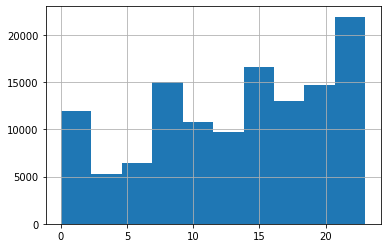

In [ ]:
df['hour'].hist()

In [ ]:
df.to_csv('final_2022_125.csv', index = False)

In [ ]:
!zip final_2022_125.zip final_2022_125.csv

  adding: final_2022_125.csv (deflated 90%)


In [ ]:

df

,1,2,dt,id,age,person,address,porod,type,stat,diag,result,state,base,first,last,hour,month,weekday,week
0,3,01-2020,2020-01-01,8(8),26,"родственник, проживающий совместно с больным",NaN,"Температура, взрослый",Первичный,неотложное состояние,ОРВИ. Гипертермический синдром,"оказана помощь, больной оставлен на месте","ГБУЗ НО ""Городская поликлиника №7"" (ул. Верхне...",ПСМП №7,09:46:15,09:52:22,9.0,1,3,1
1,74,01-2020,2020-01-01,92(92),0,"родственник, проживающий совместно с больным",NaN,"Температура, ребенок >1 года, других жалоб нет",Первичный,внезапное заболевание,ОРВИ. Гипертермический синдром,отказ от транспортировки для госпитализации в ...,"ГБУЗ НО ""Детская городская поликлиника №22"" (у...",ПСМП №7,23:32:28,23:34:27,23.0,1,3,1
2,63,01-2020,2020-01-01,87(87),61,"родственник, проживающий совместно с больным",NaN,"Высокое ад, головная боль, тошнота, рвота",Первичный,неотложное состояние,Гипертоническая болезнь. Гипертонический криз.,"оказана помощь, больной оставлен на месте","ГБУЗ НО ""Городская поликлиника №7"" (ул. Турген...",ПСМП №7,22:41:22,22:41:38,22.0,1,3,1
3,57,01-2020,2020-01-01,77(77),15,"родственник, проживающий совместно с больным",NaN,"Температура, взрослый",Первичный,неотложное состояние,ОРВИ. Гипертермический синдром,отказ от транспортировки для госпитализации в ...,"ГБУЗ НО ""Детская городская поликлиника №48"" (у...",ПСМП №7,21:15:31,21:26:15,21.0,1,3,1
4,51,01-2020,2020-01-01,69(69),24,"родственник, проживающий совместно с больным",NaN,"Температура, взрослый",Первичный,неотложное состояние,ОРВИ. Гипертермический синдром,отказ от транспортировки для госпитализации в ...,"ГБУЗ НО ""Городская клиническая больница №34"" П...",ПСМП №7,19:59:30,20:11:02,19.0,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125365,13109,05-2022,2022-05-10,6247(3),2,"родственник, проживающий совместно с больным",NaN,"Болит ухо, горло у ребенка",Первичный,неотложное состояние,ОРВИ,"оказана помощь, больной оставлен на месте","ГБУЗ НО ""Володарская центральная районная боль...",Володарская ЦРБ Ильиногорская,08:50:27,08:53:06,8.0,5,2,19
125366,13115,05-2022,2022-05-10,1312(2),73,больной или пострадавший,"рп.Гремячево, ул. Мира, д.4",Болит живот (взрослый),Первичный,неотложное состояние,Мочекаменная болезнь - МКБ. Почечная колика,"оказана помощь, больной оставлен на месте","ГБУЗ НО ""Кулебакская центральная районная боль...",Кулебакская ЦРБ,08:47:41,08:50:00,8.0,5,2,19
125367,13121,05-2022,2022-05-10,157091(35),96,"родственник, проживающий совместно с больным",NaN,Кровотечение без травмы,Первичный,внезапное заболевание,Дисциркуляторная энцефалопатия,"оказана помощь, больной оставлен на месте","ГБУЗ НО ""Городская клиническая больница №38"" П...",ПСМП №5,08:49:25,08:55:14,8.0,5,2,19
125368,13067,05-2022,2022-05-10,13125(3),27,"родственник, проживающий совместно с больным",NaN,"Температура, взрослый",Первичный,неотложное состояние,"COVID-19, вирус идентифицирован","оказана помощь, больной оставлен на месте","ГБУЗ НО ""Кстовская центральная районная больни...",Кстовская ЦРБ,09:09:09,09:15:24,9.0,5,2,19


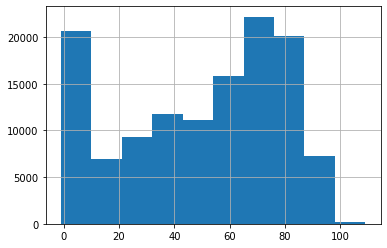

In [ ]:
df['age'].hist()

In [ ]:
# https://drive.google.com/file/d/15pzbqT71f1lkisu0wZilr4KgfD2B54pK/view?usp=sharing